In [6]:
library(randomForest)

In [7]:
require(ISLR)

In [8]:
books <- read.csv(
  "books.csv",header = TRUE, stringsAsFactors = FALSE
)

In [9]:
names(books)

[1] "bookID"             "title"              "authors"           
 [4] "average_rating"     "isbn"               "isbn13"            
 [7] "language_code"      "num_pages"          "ratings_count"     
[10] "text_reviews_count" "publication_date"   "publisher"

In [10]:
head(books)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPrÃ©,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPrÃ©,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,4,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,5,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPrÃ©,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
6,9,Unauthorized Harry Potter Book Seven News: Half-Blood Prince Analysis and Speculation,W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books


In [11]:
summary(books)

    bookID             title             authors          average_rating    
 Length:11131       Length:11131       Length:11131       Length:11131      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     isbn              isbn13          language_code       num_pages        
 Length:11131       Length:11131       Length:11131       Length:11131      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [12]:
par(mfrow=c(1,8))
for(i in 1:8) {
    hist(books[,i], main=names(books)[i])
}

ERROR: Error in hist.default(books[, i], main = names(books)[i]): 'x' must be numeric


In [13]:
par(mfrow=c(1,8))
for(i in 1:8) {
    boxplot(books[,i], main=names(books)[i])
}

ERROR: Error in x[floor(d)] + x[ceiling(d)]: non-numeric argument to binary operator


In [14]:
library(Amelia)
library(mlbench)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



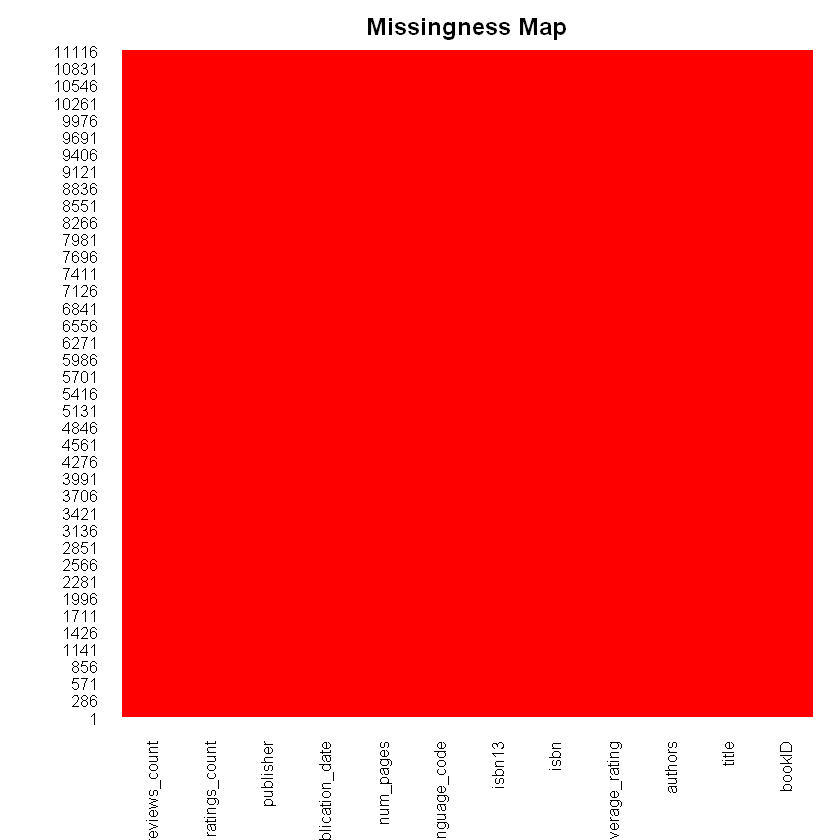

In [17]:
missmap(books, col=c("blue", "red"), legend=FALSE)

In [19]:
library(corrplot)
correlations <- cor(books[,1:8])
corrplot(correlations, method="circle")

ERROR: Error in cor(books[, 1:8]): 'x' must be numeric


In [22]:
library(caret)

In [24]:
x <- books[,1:8]
y <- books[,9]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

NULL

In [ ]:
glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)